# IM/DD Models and Datasets

In the following we show the data generated by the IM/DD links used in the `LCDDataset` and the `SSMFDataset`.


## LCD-Task

In [40]:
import matplotlib.pyplot as plt
import numpy as np

from IMDD import IMDDModel, LCDParams, helpers

link = IMDDModel(LCDParams())

print("Link parameters: ", LCDParams())
print("Link: ", link)

Link parameters:  LCDParams(N=10000, n_taps=7, alphabet=tensor([-3., -1.,  1.,  3.]), oversampling_factor=3, baudrate=112, wavelength=1270.0, dispersion_parameter=-5, fiber_length=4, noise_power_db=-20.0, roll_off=0.2, bias=2.25)
Link:  IMDDModel(
  LCDParams(N=10000, n_taps=7, alphabet=tensor([-3., -1.,  1.,  3.]), oversampling_factor=3, baudrate=112, wavelength=1270.0, dispersion_parameter=-5, fiber_length=4, noise_power_db=-20.0, roll_off=0.2, bias=2.25)
  (transmitter): Transmitter()
  (channel): OpticalChannel()
  (receiver): Receiver()
)


In [41]:
# Create indices in X to send
qs = link.source()
print("Messages:\n", qs, qs.shape)

# Each of those indices correspond to a pair of bits
gray_labels = helpers.get_graylabel(2)
print("Gray bits:\n", gray_labels)

# bits that get sent
bits = gray_labels[qs]
print("Bits to send:\n", bits, bits.shape)

Messages:
 tensor([3, 2, 1,  ..., 1, 2, 0]) torch.Size([10000])
Gray bits:
 tensor([[0, 0],
        [0, 1],
        [1, 1],
        [1, 0]], dtype=torch.uint8)
Bits to send:
 tensor([[1, 0],
        [1, 1],
        [0, 1],
        ...,
        [0, 1],
        [1, 1],
        [0, 0]], dtype=torch.uint8) torch.Size([10000, 2])


In [42]:
# Now we sent the symbols corresponding to the indices and get received symbols
# at the receiver side in shape (N, n_taps) with y[k] at (k, n_taps//2)
y_chunks = link(qs)
print("Received chunked symbols:\n", y_chunks, y_chunks.shape)

Received chunked symbols:
 tensor([[5.0571, 2.2637, 4.1176,  ..., 1.4490, 3.2374, 2.0819],
        [4.1289, 5.0571, 2.2637,  ..., 5.4121, 1.4490, 3.2374],
        [4.9857, 4.1289, 5.0571,  ..., 4.1176, 5.4121, 1.4490],
        ...,
        [5.4121, 1.4490, 3.2374,  ..., 2.0941, 1.8804, 2.1035],
        [4.1176, 5.4121, 1.4490,  ..., 2.0819, 2.0941, 1.8804],
        [2.2637, 4.1176, 5.4121,  ..., 3.2374, 2.0819, 2.0941]]) torch.Size([10000, 7])


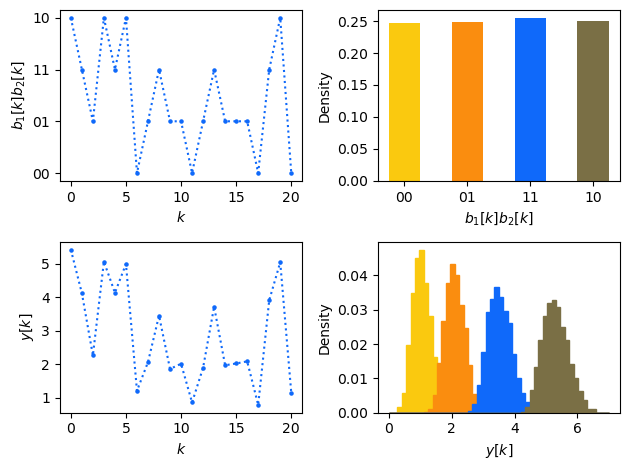

In [43]:
def plot_data(indices, samples, params):
    color = ["#FAC90F", "#FA8D0F", "#0F69FA", "#7A6F45"]

    fig, axs = plt.subplots(nrows=2, ncols=2)

    axs[0, 0].scatter(np.arange(0, 21), indices[:21].numpy(), color=color[2], s=5)
    axs[0, 0].plot(np.arange(0, 21), indices[:21].numpy(), ls=":", color=color[2])
    axs[0, 0].set_ylabel("$b_1[k]b_2[k]$")
    axs[0, 0].set_xlabel("$k$")
    axs[0, 0].set_yticks([0, 1, 2, 3])
    axs[0, 0].set_yticklabels(["00", "01", "11", "10"])

    axs[0, 1].set_ylabel("Density")
    axs[0, 1].set_xlabel("$b_1[k]b_2[k]$")
    for i in range(4):
        labels, counts = np.unique(indices[indices == i].numpy(), return_counts=True)
        axs[0, 1].bar(labels, counts / params.N, align='center', width=0.5, color=color[i])
    axs[0, 1].set_xticks([0, 1, 2, 3])
    axs[0, 1].set_xticklabels(["00", "01", "11", "10"])

    axs[1, 0].scatter(np.arange(21), samples[:21, params.n_taps//2], color=color[2], s=5)
    axs[1, 0].plot(samples[:21, params.n_taps//2], ":", color=color[2])
    axs[1, 0].set_ylabel(r"$y[k]$")
    axs[1, 0].set_xlabel("$k$")

    for i in range(4):
        (counts, bins) = np.histogram(
            samples[:, params.n_taps//2].numpy()[indices == i],
            bins=np.linspace(0, 7, 51))
        axs[1, 1].hist(
            bins[:-1], bins, weights=counts / params.N, linewidth=1, alpha=1,
            histtype="stepfilled", edgecolor=color[i], color=color[i])
    axs[1, 1].set_ylabel("Density")
    axs[1, 1].set_xlabel(r"$y[k]$")

    plt.tight_layout()
    plt.show()


plot_data(qs, y_chunks, LCDParams)

## SSMF-Task

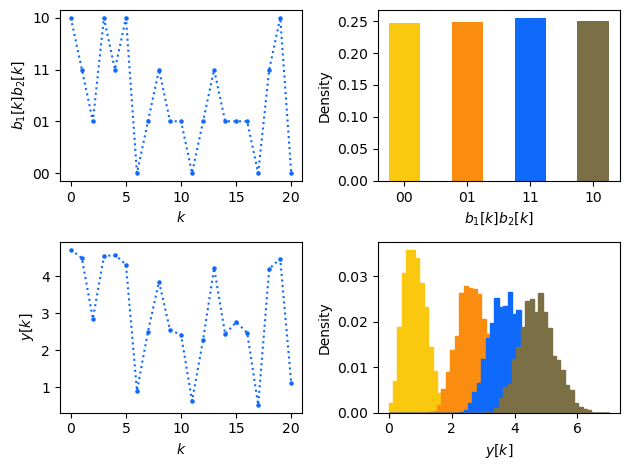

Link parameters:  SSMFParams(N=10000, n_taps=21, alphabet=tensor([0.0000, 1.0000, 1.4142, 1.7321]), oversampling_factor=3, baudrate=50, wavelength=1550.0, dispersion_parameter=-17, fiber_length=5, noise_power_db=-20.0, roll_off=0.2, bias=0.25)
Link:  IMDDModel(
  SSMFParams(N=10000, n_taps=21, alphabet=tensor([0.0000, 1.0000, 1.4142, 1.7321]), oversampling_factor=3, baudrate=50, wavelength=1550.0, dispersion_parameter=-17, fiber_length=5, noise_power_db=-20.0, roll_off=0.2, bias=0.25)
  (transmitter): Transmitter()
  (channel): OpticalChannel()
  (receiver): Receiver()
)


In [44]:
from IMDD import SSMFParams

link = IMDDModel(SSMFParams())
qs = link.source()
y_chunks = link(qs)

plot_data(qs, y_chunks, SSMFParams())

print("Link parameters: ", SSMFParams())
print("Link: ", link)

# Dataset usage


In [45]:
from IMDD import LCDDataset

# Dataset
lcd_dataset = LCDDataset()
print("Dataset size\n\t: ", len(lcd_dataset))

y_chunk, q = lcd_dataset[42]
print("y_chunk:\n\t", y_chunk, y_chunk.shape)
print("q:\n\t", q, q.shape)
print("bits b_1 and b_2 corresponding to q:\n\t", gray_labels[q])
print("Symbol x corresponding to q:\n\t", LCDParams.alphabet[q])

# We can change the number of taps
lcd_dataset = LCDDataset()
lcd_dataset.set_n_taps(5)
y_chunk, q = lcd_dataset[42]
print("y_chunk:\n\t", y_chunk, y_chunk.shape)
print("Received symbol y corresponding q:\n\t", y_chunk[q])

Dataset size
	:  10000
y_chunk:
	 tensor([4.9569, 2.6475, 3.4541, 2.3222, 2.0147, 5.1477, 2.1096]) torch.Size([7])
q:
	 tensor(1) torch.Size([])
bits b_1 and b_2 corresponding to q:
	 tensor([0, 1], dtype=torch.uint8)
Symbol x corresponding to q:
	 tensor(-1.)
y_chunk:
	 tensor([2.6475, 3.4541, 2.3222, 2.0147, 5.1477]) torch.Size([5])
Received symbol y corresponding q:
	 tensor(3.4541)


In [46]:
from torch.utils.data import DataLoader

# Training
lcd_trainset = LCDDataset(train=True)
trainloader = DataLoader(lcd_trainset, batch_size=32, shuffle=True)

# Testing
lcd_testset = LCDDataset(train=False)
testloader = DataLoader(lcd_testset, batch_size=32, shuffle=False)

y_chunk_batch, q_batch = next(iter(trainloader))
print("y_chunk_batch:\n", y_chunk_batch, y_chunk_batch.shape)
print("q:\n", q_batch, q_batch.shape)

y_chunk_batch:
 tensor([[1.8117, 0.8020, 5.4038, 3.9353, 0.8266, 1.5887, 0.7084],
        [4.9944, 3.8263, 5.2630, 5.6463, 5.2558, 6.0794, 5.3032],
        [2.5694, 4.8168, 1.4924, 1.9252, 0.8358, 0.7300, 1.0707],
        [0.8237, 0.9835, 3.8402, 5.7210, 2.2651, 1.1778, 1.6369],
        [4.6690, 4.5497, 0.9455, 1.4562, 1.4948, 3.2213, 2.3997],
        [5.6501, 5.7019, 3.6413, 3.6970, 3.6505, 3.6443, 5.4884],
        [5.3030, 2.7676, 3.1307, 1.9565, 0.9215, 4.9954, 4.0105],
        [2.2187, 0.9420, 1.6223, 4.7277, 1.1860, 4.8236, 6.5415],
        [5.7943, 3.7847, 0.7707, 5.6425, 5.7410, 3.5169, 3.4022],
        [5.6352, 0.7566, 1.9456, 2.3262, 1.5285, 1.3067, 4.8617],
        [4.5565, 1.2317, 1.8123, 2.0879, 3.7534, 5.1656, 1.0757],
        [1.7489, 3.3250, 1.0902, 1.2092, 3.4615, 3.3675, 2.2766],
        [5.0606, 4.2245, 2.1384, 3.2656, 1.7135, 2.0498, 3.6202],
        [2.0139, 1.9397, 2.1565, 5.1693, 3.8268, 0.9168, 1.8464],
        [1.1214, 2.1251, 3.2614, 2.0119, 2.1759, 5.5092, 5.5